# Objetivo

Predecir el precio de las casas en relación al tipo de habitación y el barrio.

#### Librerias
Primero, importamos las librerias que usaremos para el análisis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


#### Carga y Exploración Inicial de los Datos
Cargamos el conjunto de datos y realizamos una exploración inicial para entender su estructura y contenido.


In [2]:
data = pd.read_csv('C:/Users/rober/Machine Learning/airbnb-listings-extract.csv', sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [3]:
print(data.shape)
print('*' * 120)
data.info()

(14780, 89)
************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                

In [4]:
# Seleccionando las columnas relevantes
relevant_columns = ['Price', 'Room Type', 'Neighbourhood']
data_relevant = data[relevant_columns]
data_relevant.head()

,Price,Room Type,Neighbourhood
0,58.0,Entire home/apt,NaN
1,70.0,Entire home/apt,NaN
2,70.0,Entire home/apt,NaN
3,229.0,Entire home/apt,NaN
4,149.0,Entire home/apt,L'Antiga Esquerra de l'Eixample


In [5]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          14763 non-null  float64
 1   Room Type      14780 non-null  object 
 2   Neighbourhood  9551 non-null   object 
dtypes: float64(1), object(2)
memory usage: 346.5+ KB


---

---


### Limpieza y Preparación de Datos

Para garantizar que nuestros datos estén en un formato óptimo para el análisis, iniciaremos con el proceso de extracción y limpieza de las siguientes columnas clave:

- **Price**: Se realiza una limpieza de esta columna para asegurar que solo contenga valores numéricos. 

- **Room Type**: Esta columna ya se encuentra en un formato adecuado para el análisis, por lo que no requerirá ajustes adicionales.

- **Neighbourhood**: Se han identificado algunos valores faltantes en esta columna.

- **Valores Nulos**: Las filas donde Price o Neighbourhood son nulos se van a eliminar.

---


In [6]:
# Seleccionando las columnas relevantes y creando una copia del DataFrame
data_relevant = data[relevant_columns].copy()

# Limpieza de la columna 'Price'
data_relevant['Price'] = data_relevant['Price'].replace('[\$,]', '', regex=True).astype(float)
print("Después de limpiar 'Price':")
print(data_relevant.head())




Después de limpiar 'Price':
   Price        Room Type                    Neighbourhood
0   58.0  Entire home/apt                              NaN
1   70.0  Entire home/apt                              NaN
2   70.0  Entire home/apt                              NaN
3  229.0  Entire home/apt                              NaN
4  149.0  Entire home/apt  L'Antiga Esquerra de l'Eixample


In [7]:
# Eliminando filas con valores faltantes
data_clean = data_relevant.dropna()
print("Después de eliminar filas con valores faltantes:")
print(data_clean.info())



Después de eliminar filas con valores faltantes:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9539 entries, 4 to 14779
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          9539 non-null   float64
 1   Room Type      9539 non-null   object 
 2   Neighbourhood  9539 non-null   object 
dtypes: float64(1), object(2)
memory usage: 298.1+ KB
None


---

---




### Manejo de Outliers en Price

Identificamos y manejamos los outliers en la columna `Price`. Este proceso es crucial para mejorar la precisión del análisis, ya que los valores atípicos pueden distorsionar los resultados y las interpretaciones. 


In [8]:
# Manejo de outliers para 'Price'
Q1 = data_clean['Price'].quantile(0.25)
Q3 = data_clean['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = data_clean[(data_clean['Price'] >= lower_bound) & (data_clean['Price'] <= upper_bound)]
print("Después de eliminar outliers en 'Price':")
print(data_no_outliers.describe())

Después de eliminar outliers en 'Price':
             Price
count  9043.000000
mean     62.300122
std      34.766599
min       9.000000
25%      35.000000
50%      55.000000
75%      80.000000
max     172.000000


---

---


### Distribución de Precios

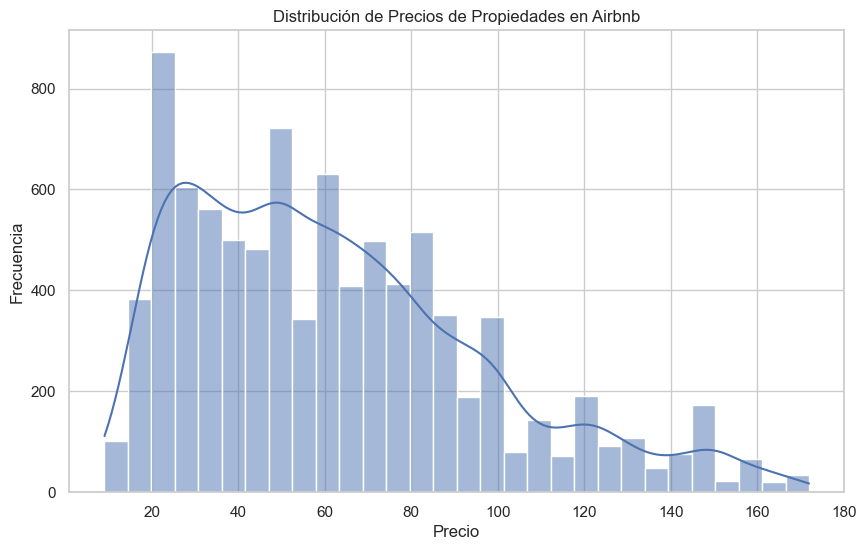

In [9]:
# Configuración de estilo de gráficos
sns.set(style="whitegrid")

# Histograma de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['Price'], bins=30, kde=True)
plt.title('Distribución de Precios de Propiedades en Airbnb')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

La distribución de precios en el conjunto de datos revela patrones interesantes:

- **Concentración en el Rango Bajo**: Observamos que la mayoría de los precios se agrupan en el extremo inferior del espectro. Esto indica una tendencia predominante hacia propiedades más asequibles en nuestro conjunto de datos.

- **Cola Larga hacia la Derecha**: Existe una cola extendida hacia el lado derecho de la distribución. Esto sugiere la presencia de algunas propiedades con precios significativamente más altos, aunque estas son menos frecuentes en comparación con las opciones más económicas.


---

---


### Análisis de Precios por Tipo de Habitación: Gráfico de Caja




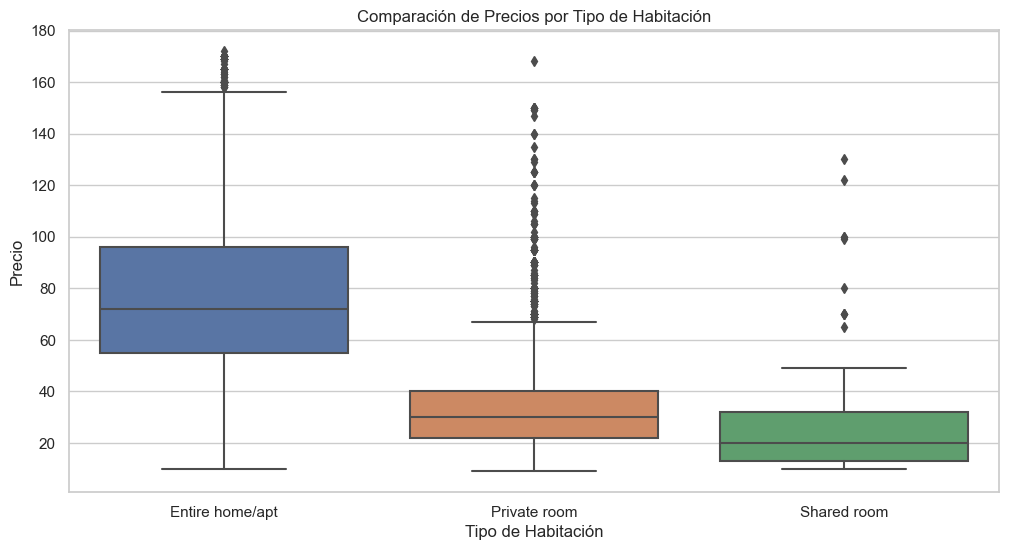

In [10]:
# Gráfico de caja para comparar precios entre diferentes tipos de habitaciones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Room Type', y='Price', data=data_no_outliers)
plt.title('Comparación de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()

El gráfico de caja proporciona una visión detallada de cómo varían los precios entre los diferentes tipos de habitaciones:

- **Distribuciones Únicas por Tipo de Habitación**: Cada categoría de habitación (como "Entire home/apt", "Private room", y "Shared room") muestra una distribución de precios distinta, caracterizada por medianas y rangos de precios específicos.

- **"Entire home/apt"**: Esta categoría tiende a presentar precios más elevados. Esto es previsible, ya que ofrece mayor privacidad y espacio, lo que generalmente se valora más en el mercado.

- **"Private room" y "Shared room"**: Estos tipos de habitaciones suelen ser opciones más económicas. Se caracterizan por tener una mediana y un rango de precios más bajos, reflejando su menor demanda de privacidad y espacio en comparación con "Entire home/apt".

---

---


### Análisis del Gráfico de Caja: 10 Barrios con Más Listados en Airbnb

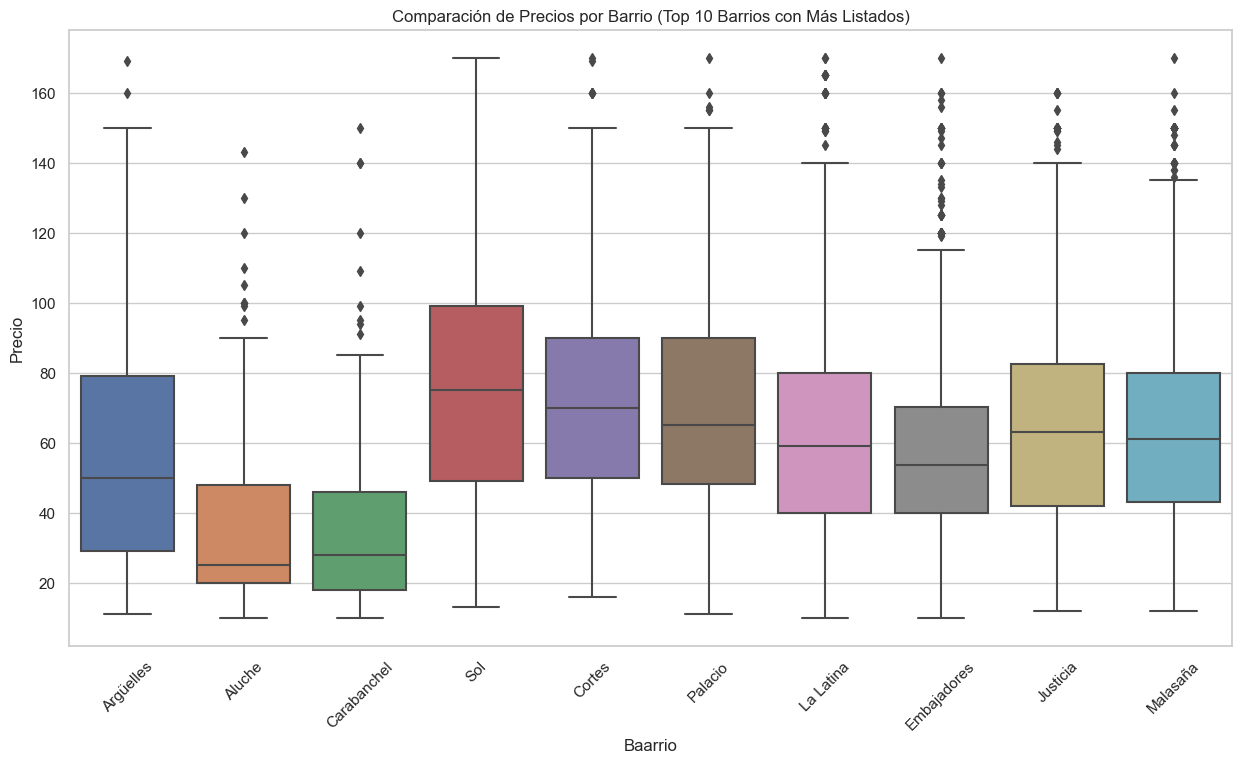

In [11]:
# Análisis de precios por barrio para los 10 barrios con más listados
top_neighbourhoods = data_no_outliers['Neighbourhood'].value_counts().head(10).index
data_top_neighbourhoods = data_no_outliers[data_no_outliers['Neighbourhood'].isin(top_neighbourhoods)]
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighbourhood', y='Price', data=data_top_neighbourhoods)
plt.xticks(rotation=45)
plt.title('Comparación de Precios por Barrio (Top 10 Barrios con Más Listados)')
plt.xlabel('Baarrio')
plt.ylabel('Precio')
plt.show()

El gráfico de caja para los 10 barrios con más listados en Airbnb nos proporciona varias observaciones clave:

- **Variabilidad en Precios entre Barrios**: Se observa una variabilidad considerable en los precios a través de los diferentes barrios. Esto se evidencia en las medianas de precios, que varían significativamente, y en los rangos de precios, que son más amplios en algunos barrios. Esto indica una diversidad en las opciones de alojamiento disponibles.

- **Concentración de Propiedades de Alto Precio**: En ciertos barrios, notamos una concentración más alta de propiedades con precios elevados. Esto se manifiesta en la presencia de valores atípicos (outliers) en el extremo superior de sus rangos de precios, sugiriendo que estos barrios podrían ser zonas de mayor demanda o de alojamientos de lujo.


---

---


#### Preparación para Modelado
Preparamos los datos para el modelado, incluyendo la codificación de variables categóricas y la división en conjuntos de entrenamiento y prueba.


In [12]:
from sklearn.model_selection import train_test_split

# Codificación One-Hot de las variables categóricas
data_model = pd.get_dummies(data_no_outliers, columns=['Room Type', 'Neighbourhood'])

# División del dataset en conjuntos de entrenamiento y prueba
X = data_model.drop('Price', axis=1)
y = data_model['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Modelado y Evaluación
Entrenamos y evaluamos diferentes modelos de machine learning, como regresión lineal, Lasso y Ridge, para predecir los precios de las propiedades.


#### Distribución de los Datos

La distribución de los datos en el conjunto de entrenamiento y prueba se presenta de la siguiente manera:

- **Conjunto de Entrenamiento**: Contiene 7234 muestras, lo que representa aproximadamente el **80%** del total de datos.

- **Conjunto de Prueba**: Compuesto por 1809 muestras, representando aproximadamente el **20%** del total de datos. 




---

---

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenando el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluando el modelo
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)



mse_lin_reg, r2_lin_reg



(1.7523809302893188e+25, -1.408496561907542e+22)

#### Estos resultados indican un problema con el modelo. Un valor de R² negativo de esta magnitud y un MSE extremadamente alto sugieren que el modelo no está funcionando adecuadamente.


---

---

### Modelo de Regresión Lasso

#### Utilizaremos la regresión Lasso para la regularización. La regresión Lasso es útil en situaciones donde hay alta multicolinealidad

In [15]:
from sklearn.linear_model import Lasso

# Definiendo el valor de alpha para Lasso
alpha_lasso = 0.1

# Creando y entrenando el modelo Lasso
lasso = Lasso(alpha=alpha_lasso)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Calculando el MSE y R² para Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Resultados del Modelo Lasso")
print("====================================")
print(f"Alpha: {alpha_lasso}")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.4f}")





Resultados del Modelo Lasso
Alpha: 0.1
MSE: 748.65
R²: 0.3983




Los resultados recientes indican una **mejora significativa** en comparación con el modelo de regresión lineal anterior:

- **R-squared (R²)**: Ahora es de `0.398`, lo que significa que el modelo puede explicar aproximadamente el **39.8%** de la variabilidad en los precios de las propiedades. Esto representa una comprensión sustancialmente mejor de los factores que influyen en los precios.

- **Mean Squared Error (MSE)**: Se ha reducido a un nivel más manejable y razonable, lo que indica una mayor precisión en las predicciones del modelo.

Estas mejoras sugieren que el modelo ajustado es considerablemente más efectivo y preciso en la predicción de precios que la versión anterior.


---

---

### Evaluación del Modelo Ridge

In [16]:
from sklearn.linear_model import Ridge

# Definiendo el valor de alpha para Ridge
alpha_ridge = 1.0

# Creando y entrenando el modelo Ridge
ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Calculando el MSE y R² para Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Resultados del Modelo Ridge")
print("====================================")
print(f"Alpha: {alpha_ridge}")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.4f}")





Resultados del Modelo Ridge
Alpha: 1.0
MSE: 680.44
R²: 0.4531




Los resultados obtenidos indican lo siguiente:
 
- **Comparación con el Modelo Lasso**: La capacidad de este modelo para predecir el precio resulta ser ligeramente superior en comparación con el modelo Lasso.



---


---

## **Validación Cruzada**


In [17]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Lasso
scores_lasso_r2 = cross_val_score(lasso, X, y, cv=5, scoring='r2')
avg_r2_lasso = scores_lasso_r2.mean()
scores_lasso_mse = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
avg_mse_lasso = -scores_lasso_mse.mean()

# Validación cruzada para Ridge
scores_ridge_r2 = cross_val_score(ridge, X, y, cv=5, scoring='r2')
avg_r2_ridge = scores_ridge_r2.mean()
scores_ridge_mse = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
avg_mse_ridge = -scores_ridge_mse.mean()


print("Resultados de la Validación Cruzada")
print("====================================")
print(f"Modelo Lasso (alpha = {alpha_lasso}):")
print(f"  R² Promedio: {avg_r2_lasso:.4f}")
print(f"  MSE Promedio: {avg_mse_lasso:.2f}")
print()
print(f"Modelo Ridge (alpha = {alpha_ridge}):")
print(f"  R² Promedio: {avg_r2_ridge:.4f}")
print(f"  MSE Promedio: {avg_mse_ridge:.2f}")



Resultados de la Validación Cruzada
Modelo Lasso (alpha = 0.1):
  R² Promedio: 0.4182
  MSE Promedio: 702.35

Modelo Ridge (alpha = 1.0):
  R² Promedio: 0.4622
  MSE Promedio: 648.12


Los resultados de la validación cruzada indican que, en promedio, el modelo **Ridge** muestra un mejor desempeño que el modelo **Lasso** para este conjunto de datos específico. Esto se refleja tanto en términos de ajuste (R²) como en la


## **Conclusión:**

A pesar de que el modelo **Ridge** demostró un mejor desempeño en comparación con el modelo **Lasso**, el valor de R² todavía indica que existe una cantidad significativa de variabilidad en los datos que el modelo no puede capturar de manera satisfactoria.
